In [1]:
import os
import sys

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.gridspec import GridSpec

import cmocean

import netCDF4 as nc
import rasterio as rs

ISSM_DIR = os.getenv('ISSM_DIR')
# sys.path.append(os.path.join(ISSM_DIR, 'bin/'))
# sys.path.append(os.path.join(ISSM_DIR, 'lib/'))
sys.path.append(os.path.join(ISSM_DIR, 'src/m/dev/'))
import devpath
from read_netCDF import read_netCDF


In [2]:
D = np.loadtxt('data/geom/IS_outline.csv', delimiter=',', quotechar='"', skiprows=1)
pid = D[:,0]
vx = D[:,1]
vy = D[:,2]

In [3]:
md = read_netCDF('data/geom/IS_bamg.nc')
mtri = Triangulation(md.mesh.x/1e3, md.mesh.y/1e3, md.mesh.elements-1)

surf = np.load('data/geom/IS_surface.npy')
bed = np.load('data/geom/IS_bed.npy')

Min velocity: 0.326997003834512
Max velocity: 154.53047206791297
Mean velocity: 79.08186587195311
Median velocity: 81.90669695863483


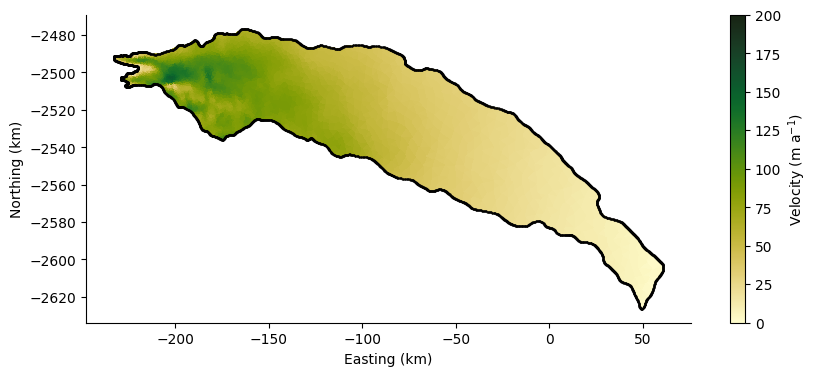

In [4]:
vel = np.load('data/velocity/IS_vel.npy')

fig, ax = plt.subplots(figsize=(10, 4), facecolor='w')
pc = ax.tripcolor(mtri, vel, vmin=0, vmax=200, cmap=cmocean.cm.speed)
ax.plot(vx/1e3, vy/1e3, linestyle='', marker='.', markersize=1, color='k')
ax.set_aspect('equal')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Easting (km)')
ax.set_ylabel('Northing (km)')
cbar = fig.colorbar(pc, label='Velocity (m a$^{-1}$)')

print('Min velocity:', np.min(vel))
print('Max velocity:', np.max(vel))
print('Mean velocity:', np.mean(vel))
print('Median velocity:', np.median(vel))

Min elevation: 145.19456005089916
Max elevation: 2505.0987969291073
Mean elevation: 1058.099471488331
Median elevation: 987.6160163536666


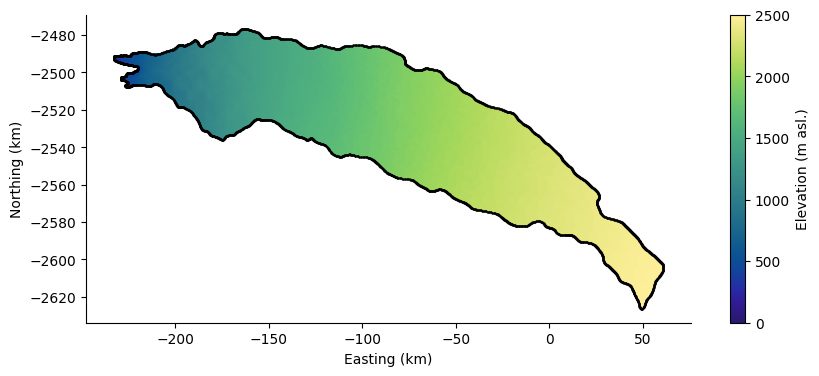

In [5]:
fig, ax = plt.subplots(figsize=(10, 4), facecolor='w')
pc = ax.tripcolor(mtri, surf, vmin=0, vmax=2500, cmap=cmocean.cm.haline)
ax.plot(vx/1e3, vy/1e3, linestyle='', marker='.', markersize=1, color='k')
ax.set_aspect('equal')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Easting (km)')
ax.set_ylabel('Northing (km)')
cbar = fig.colorbar(pc, label='Elevation (m asl.)')

print('Min elevation:', np.min(surf))
print('Max elevation:', np.max(surf))
print('Mean elevation:', np.mean(surf))
print('Median elevation:', np.median(surf))

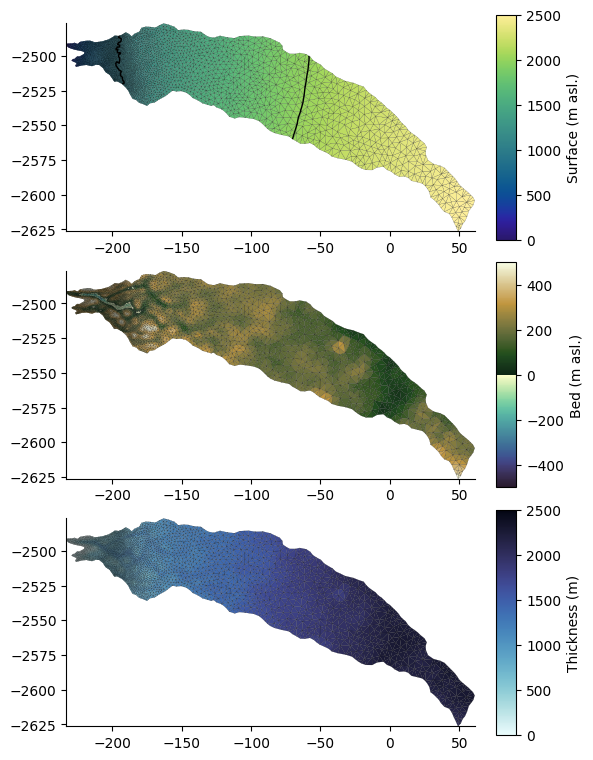

In [6]:
## Plot interpolated elevations and contour by elevation bands
min_elev = 1000
ELA_elev = 2000
mtri = Triangulation(md.mesh.x/1e3, md.mesh.y/1e3, md.mesh.elements-1)

fig = plt.figure(figsize=(6, 8))
gs = GridSpec(3, 2, width_ratios=(100, 5), left=0.1, bottom=0.05,
    right=0.85, top=0.95, hspace=0.1, wspace=0.1)
axs = np.array([fig.add_subplot(gs[i,0]) for i in range(3)])
caxs = np.array([fig.add_subplot(gs[i,1]) for i in range(3)])

surfpc = axs[0].tripcolor(mtri, surf, vmin=0, vmax=2500,
    edgecolor='k', linewidth=0.1, cmap=cmocean.cm.haline)
axs[0].tricontour(mtri, surf, levels=[min_elev, ELA_elev], colors='k', linewidths=1)
cbar0 = fig.colorbar(surfpc, cax=caxs[0])
cbar0.set_label('Surface (m asl.)')

bedpc = axs[1].tripcolor(mtri, bed, vmin=-500, vmax=500,
    cmap=cmocean.cm.topo,
    edgecolor='k', linewidth=0.1)
cbar1 = fig.colorbar(bedpc, cax=caxs[1])
cbar1.set_label('Bed (m asl.)')

thickness = surf - bed
thickpc = axs[2].tripcolor(mtri, thickness, vmin=0, vmax=2500,
    cmap=cmocean.cm.ice_r, edgecolor='k', linewidth=0.1)
cbar2 = fig.colorbar(thickpc, cax=caxs[2])
cbar2.set_label('Thickness (m)')


for ax in axs:
    ax.set_aspect('equal')
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlim([np.min(md.mesh.x)/1e3, np.max(md.mesh.x)/1e3])
    ax.set_ylim([np.min(md.mesh.y)/1e3, np.max(md.mesh.y)/1e3])

fig.savefig('surface_bed_thickness.png', dpi=800)